In [ ]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from Pitch.My_Pitch import \
    myPitch  # might need adaptation of path depending on whether it is used in pycharm or jupyter notebook
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import numpy as np
from Data.Statsbomb_Data import match_events



In [ ]:
df, teams = match_events(match_id=3857261, event_filter='passes')

In [ ]:
df

In [ ]:
from Pass_Data import pass_data
passdata = pass_data(df, data_source='Statsbomb', mirror_away=[''])
print(passdata)

In [ ]:
passdata.data

In [ ]:
pE, pC = passdata.get_passes(get='England')

pBellingham, n = passdata.get_passes(get='Jude Bellingham', data=pE)
pBellingham

In [ ]:
pm = passdata.pass_map(pdop_y=-0.025, pdop_o=1,data=pBellingham)

In [ ]:
passdata2 = pass_data(df, data_source='Statsbomb', mirror_away=[''], scale_to_pitch='myPitch')
print(passdata2)

In [ ]:
pBellingham, n = passdata2.get_passes(get='Jude Bellingham')
pBellingham

In [ ]:
pm = passdata2.pass_map(pdop_y=1.05, pdop_o=1,data=pBellingham, pitch_col='#96b279')

# Pass network

In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from Pitch.My_Pitch import \
    myPitch  # might need adaptation of path depending on whether it is used in pycharm or jupyter notebook
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import numpy as np
from Data.Statsbomb_Data import match_events



None


In [2]:
df, teams = match_events(match_id=3857261, event_filter='passes')
from Pass_Data import pass_data
passdata = pass_data(df, data_source='Statsbomb', mirror_away=[''])
print(passdata)
pE, pC = passdata.get_passes(get='England')
pE

pass_data object of Statsbomb of shape (981, 19). Coordinate ranges are (0, 120) for x and (80, 0) for y


,player,period,minute,second,team,outcome,type,x_initial,y_initial,x_received,y_received,cross,cut-back,switch,shot_assist,goal_assist,play_pattern,related_events,recipient
2,Declan Rice,1,0,6,England,Out,Recovery,29.9,62.2,56.8,80.0,False,False,False,False,False,From Kick Off,"[cc3a9362-5f27-4b31-a11f-f776a3f12858, dd4b8fa...",Philip Foden
4,John Stones,1,0,25,England,Out,Recovery,20.4,74.7,74.5,80.0,False,False,False,False,False,From Throw In,"[544d2090-8f94-48d1-b78b-f3ffa62ba544, b4c9473...",Harry Kane
11,Jordan Brian Henderson,1,0,46,England,Complete,Recovery,80.0,73.5,80.2,78.7,False,False,False,False,False,Regular Play,"[4f00b46f-ee51-4377-8a43-4b4054cc0364, b0fff6e...",Jude Bellingham
12,Jude Bellingham,1,0,50,England,Complete,Regular,80.4,76.9,84.7,70.1,False,False,False,False,False,Regular Play,[e6b312b3-f913-4835-8a4a-b6b3722ca506],Harry Kane
13,Harry Kane,1,0,50,England,Out,Regular,84.5,70.1,68.2,80.0,False,False,False,False,False,Regular Play,[4a8cdb84-358c-4820-9c83-aff4ffb1f8bb],Kyle Walker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Jordan Brian Henderson,2,93,15,England,Complete,Regular,82.2,37.0,81.3,42.1,False,False,False,False,False,From Free Kick,[a51c9035-edee-4e2f-9972-5d6893455952],Jack Grealish
976,Jack Grealish,2,93,19,England,Complete,Regular,107.2,50.4,108.4,45.3,False,False,False,False,False,From Free Kick,[c5919be5-1b37-438f-a378-eb91a0f42d6f],Callum Wilson
977,Jack Grealish,2,93,24,England,Complete,Regular,111.7,47.7,111.0,48.5,False,False,False,True,False,From Free Kick,[9e0c67f4-ef33-4a0f-ad8b-b7df08b6dd66],Philip Foden
979,Trent Alexander-Arnold,2,93,55,England,Complete,Throw-in,113.5,80.0,103.9,57.2,False,False,False,False,False,From Throw In,[069ae913-ee12-4380-88d9-e7ccdc0f62ac],Jack Grealish


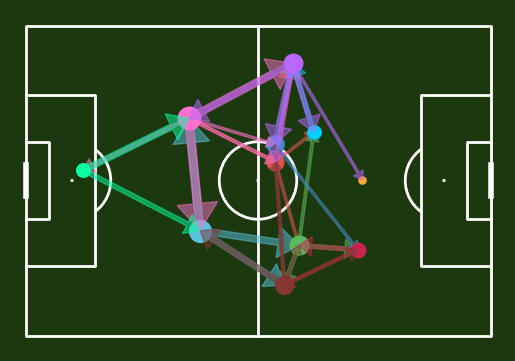

In [3]:
net_fig, net_dict = passdata.pass_network(data=pE)

In [4]:
net_dict

{'Declan Rice': {'x_avg': 64.49166666666666,
  'y_avg': 35.19166666666666,
  'n': 48,
  'n_complete': 45,
  'receivers': {'Philip Foden': 5,
   'Jude Bellingham': 2,
   'Luke Shaw': 12,
   'Harry Maguire': 8,
   'John Stones': 5,
   'Jordan Brian Henderson': 6,
   'Harry Kane': 1,
   'Marcus Rashford': 6,
   'Kyle Walker': 3}},
 'John Stones': {'x_avg': 45.054878048780495,
  'y_avg': 52.91097560975609,
  'n': 82,
  'n_complete': 75,
  'receivers': {'Harry Kane': 2,
   'Jordan Brian Henderson': 16,
   'Kyle Walker': 14,
   'Jordan Pickford': 5,
   'Harry Maguire': 19,
   'Declan Rice': 4,
   'Luke Shaw': 2,
   'Philip Foden': 2,
   'Marcus Rashford': 2,
   'Jude Bellingham': 2}},
 'Jordan Brian Henderson': {'x_avg': 70.5311475409836,
  'y_avg': 56.74262295081967,
  'n': 61,
  'n_complete': 50,
  'receivers': {'Jude Bellingham': 5,
   'John Stones': 5,
   'Philip Foden': 10,
   'Kyle Walker': 9,
   'Harry Maguire': 5,
   'Harry Kane': 3,
   'Jordan Pickford': 4,
   'Declan Rice': 3,
   '

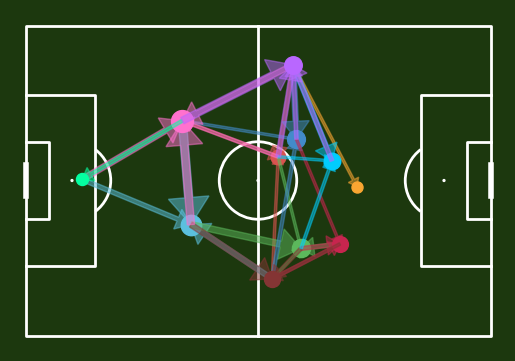

In [5]:
# by received position
net_fig, net_dict = passdata.pass_network(data=pE, by_receive=True)

In [6]:
net_dict

{'Declan Rice': {'x_avg': 65.20810810810809,
  'y_avg': 33.87837837837838,
  'n': 37,
  'n_complete': 36,
  'passers': {'Marcus Rashford': 4,
   'John Stones': 4,
   'Harry Maguire': 7,
   'Luke Shaw': 8,
   'Jude Bellingham': 2,
   'Kyle Walker': 6,
   'Jordan Brian Henderson': 3,
   'Philip Foden': 2,
   'Harry Kane': 1}},
 'John Stones': {'x_avg': 42.6875,
  'y_avg': 51.38472222222222,
  'n': 72,
  'n_complete': 72,
  'passers': {'Jude Bellingham': 5,
   'Jordan Brian Henderson': 5,
   'Harry Maguire': 21,
   'Philip Foden': 4,
   'Declan Rice': 5,
   'Jordan Pickford': 11,
   'Kyle Walker': 13,
   'Luke Shaw': 1}},
 'Jordan Brian Henderson': {'x_avg': 71.10000000000001,
  'y_avg': 57.545614035087716,
  'n': 57,
  'n_complete': 52,
  'passers': {'John Stones': 16,
   'Declan Rice': 6,
   'Kyle Walker': 6,
   'Philip Foden': 10,
   'Luke Shaw': 2,
   'Jude Bellingham': 3,
   'Marcus Rashford': 5,
   'Harry Maguire': 2}},
 'Jude Bellingham': {'x_avg': 69.92727272727274,
  'y_avg': 29.

In [7]:
df, teams = match_events(match_id=3857261, event_filter='passes')
from Pass_Data import pass_data
passdata = pass_data(df, data_source='Statsbomb', mirror_away=[''], scale_to_pitch='myPitch')
print(passdata)
pE, pC = passdata.get_passes(get='England')
pE

pass_data object of Statsbomb of shape (981, 19). Coordinate ranges are (0, 105) for x and (0, 65) for y


,player,period,minute,second,team,outcome,type,x_initial,y_initial,x_received,y_received,cross,cut-back,switch,shot_assist,goal_assist,play_pattern,related_events,recipient
2,Declan Rice,1,0,6,England,Out,Recovery,26.1625,14.46250,49.7000,0.00000,False,False,False,False,False,From Kick Off,"[cc3a9362-5f27-4b31-a11f-f776a3f12858, dd4b8fa...",Philip Foden
4,John Stones,1,0,25,England,Out,Recovery,17.8500,4.30625,65.1875,0.00000,False,False,False,False,False,From Throw In,"[544d2090-8f94-48d1-b78b-f3ffa62ba544, b4c9473...",Harry Kane
11,Jordan Brian Henderson,1,0,46,England,Complete,Recovery,70.0000,5.28125,70.1750,1.05625,False,False,False,False,False,Regular Play,"[4f00b46f-ee51-4377-8a43-4b4054cc0364, b0fff6e...",Jude Bellingham
12,Jude Bellingham,1,0,50,England,Complete,Regular,70.3500,2.51875,74.1125,8.04375,False,False,False,False,False,Regular Play,[e6b312b3-f913-4835-8a4a-b6b3722ca506],Harry Kane
13,Harry Kane,1,0,50,England,Out,Regular,73.9375,8.04375,59.6750,0.00000,False,False,False,False,False,Regular Play,[4a8cdb84-358c-4820-9c83-aff4ffb1f8bb],Kyle Walker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Jordan Brian Henderson,2,93,15,England,Complete,Regular,71.9250,34.93750,71.1375,30.79375,False,False,False,False,False,From Free Kick,[a51c9035-edee-4e2f-9972-5d6893455952],Jack Grealish
976,Jack Grealish,2,93,19,England,Complete,Regular,93.8000,24.05000,94.8500,28.19375,False,False,False,False,False,From Free Kick,[c5919be5-1b37-438f-a378-eb91a0f42d6f],Callum Wilson
977,Jack Grealish,2,93,24,England,Complete,Regular,97.7375,26.24375,97.1250,25.59375,False,False,False,True,False,From Free Kick,[9e0c67f4-ef33-4a0f-ad8b-b7df08b6dd66],Philip Foden
979,Trent Alexander-Arnold,2,93,55,England,Complete,Throw-in,99.3125,0.00000,90.9125,18.52500,False,False,False,False,False,From Throw In,[069ae913-ee12-4380-88d9-e7ccdc0f62ac],Jack Grealish


(<Figure size 640x480 with 1 Axes>,
 {'Declan Rice': {'x_avg': 56.43020833333333,
   'y_avg': 36.40677083333333,
   'n': 48,
   'n_complete': 45,
   'receivers': {'Philip Foden': 5,
    'Jude Bellingham': 2,
    'Luke Shaw': 12,
    'Harry Maguire': 8,
    'John Stones': 5,
    'Jordan Brian Henderson': 6,
    'Harry Kane': 1,
    'Marcus Rashford': 6,
    'Kyle Walker': 3}},
  'John Stones': {'x_avg': 39.42301829268292,
   'y_avg': 22.009832317073172,
   'n': 82,
   'n_complete': 75,
   'receivers': {'Harry Kane': 2,
    'Jordan Brian Henderson': 16,
    'Kyle Walker': 14,
    'Jordan Pickford': 5,
    'Harry Maguire': 19,
    'Declan Rice': 4,
    'Luke Shaw': 2,
    'Philip Foden': 2,
    'Marcus Rashford': 2,
    'Jude Bellingham': 2}},
  'Jordan Brian Henderson': {'x_avg': 61.714754098360665,
   'y_avg': 18.896618852459014,
   'n': 61,
   'n_complete': 50,
   'receivers': {'Jude Bellingham': 5,
    'John Stones': 5,
    'Philip Foden': 10,
    'Kyle Walker': 9,
    'Harry Maguire'

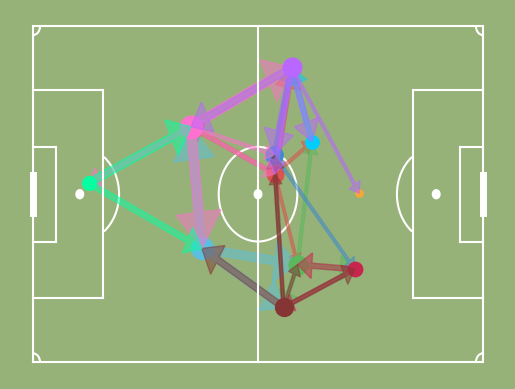

In [8]:
passdata.pass_network(data=pE, pitch_col='#96b279')

In [10]:
df, teams = match_events(match_id=3857261, event_filter='passes')
from Pass_Data import pass_data
passdata = pass_data(df, data_source='Statsbomb', mirror_away=[''], scale_to_pitch='myPitch')
print(passdata)
pW, pC = passdata.get_passes(get='Wales')
pW

pass_data object of Statsbomb of shape (981, 19). Coordinate ranges are (0, 105) for x and (0, 65) for y


,player,period,minute,second,team,outcome,type,x_initial,y_initial,x_received,y_received,cross,cut-back,switch,shot_assist,goal_assist,play_pattern,related_events,recipient
0,Aaron Ramsey,1,0,0,Wales,Complete,Kick Off,52.5000,32.50000,31.9375,41.68125,False,False,False,False,False,From Kick Off,[b7e37843-7498-42db-b117-ad4d40e0ed8c],Ben Davies
1,Ben Davies,1,0,3,Wales,Incomplete,Regular,36.5750,43.87500,78.9250,50.45625,False,False,False,False,False,From Kick Off,[916f2f17-c7ba-44b0-bce6-711b100f6d29],None
3,Ben Davies,1,0,21,Wales,Incomplete,Throw-in,55.9125,64.91875,87.2375,60.61250,False,False,False,False,False,From Throw In,"[88a6c333-6ec0-4019-98c7-d1109c3c14ef, 9c31f4d...",Kieffer Roberto Francisco Moore
5,Ben Davies,1,0,39,Wales,Complete,Throw-in,38.1500,64.91875,44.6250,61.10000,False,False,False,False,False,From Throw In,[9bc9a6f7-86bd-4a8c-80f6-c530fe42df8f],Aaron Ramsey
6,Aaron Ramsey,1,0,40,Wales,Complete,Regular,44.6250,61.10000,37.1000,64.26875,False,False,False,False,False,From Throw In,[8ac43856-0fbb-4f9e-a341-52c9486e2eae],Ben Davies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,Ethan Ampadu,2,86,9,Wales,Complete,Regular,71.1375,7.63750,86.8000,39.16250,False,False,False,True,False,Regular Play,[bd174294-1a68-430e-bdf0-900a20646798],Kieffer Roberto Francisco Moore
918,Joseff Morrell,2,87,46,Wales,Incomplete,Regular,45.5875,23.48125,60.7250,13.24375,False,False,False,False,False,From Free Kick,"[2aec1458-bbd3-4b62-a537-432d9f44fdae, e9c77f4...",Brennan Johnson
949,Danny Ward,2,91,21,Wales,Complete,Goal Kick,6.1250,29.16875,65.7125,49.07500,False,False,False,False,False,From Goal Kick,[6b111a7a-87d5-4aa7-af2a-27ce2b925400],Kieffer Roberto Francisco Moore
950,Kieffer Roberto Francisco Moore,2,91,25,Wales,Incomplete,Regular,65.4500,48.83125,70.6125,30.14375,False,False,False,False,False,From Goal Kick,"[8e533d9c-46a4-4ba2-8c03-aee95e49e9cc, b54d630...",Brennan Johnson


(<Figure size 640x480 with 1 Axes>,
 {'Aaron Ramsey': {'x_avg': 56.52791666666667,
   'y_avg': 32.995625000000004,
   'n': 30,
   'n_complete': 24,
   'receivers': {'Ben Davies': 5,
    'Joe Rodon': 6,
    'Neco Williams': 1,
    'Ethan Ampadu': 3,
    'Kieffer Roberto Francisco Moore': 2,
    'Joe Allen': 2,
    'Daniel James': 2,
    'Chris Mepham': 2}},
  'Ben Davies': {'x_avg': 40.48534482758621,
   'y_avg': 57.525,
   'n': 29,
   'n_complete': 15,
   'receivers': {'Kieffer Roberto Francisco Moore': 9,
    'Aaron Ramsey': 6,
    'Danny Ward': 1,
    'Daniel James': 5,
    'Ethan Ampadu': 4,
    'Joe Rodon': 2}},
  'Joe Rodon': {'x_avg': 30.782880434782616,
   'y_avg': 38.275815217391305,
   'n': 46,
   'n_complete': 42,
   'receivers': {'Ethan Ampadu': 3,
    'Ben Davies': 7,
    'Aaron Ramsey': 3,
    'Daniel James': 3,
    'Joe Allen': 4,
    'Chris Mepham': 10,
    'Danny Ward': 4}},
  'Ethan Ampadu': {'x_avg': 49.76250000000001,
   'y_avg': 24.885714285714286,
   'n': 35,
   'n

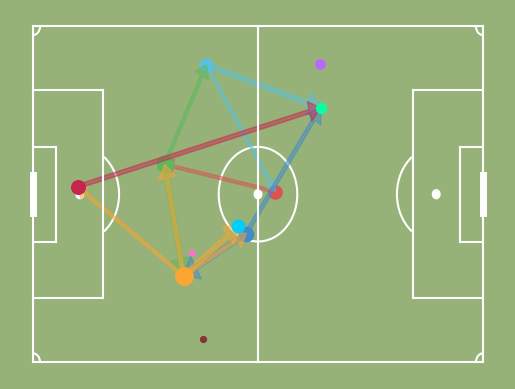

In [11]:
passdata.pass_network(data=pW, pitch_col='#96b279')